## Import Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Style
plt.rcParams.update({
    'figure.facecolor': '#0e1117',
    'axes.facecolor': '#161a28',
    'axes.edgecolor': '#2e3a5c',
    'axes.labelcolor': '#9ba8c2',
    'xtick.color': '#9ba8c2',
    'ytick.color': '#9ba8c2',
    'text.color': 'white',
    'grid.color': '#2e3a5c',
    'grid.alpha': 0.5,
})

print(' Libraries imported successfully')

 Libraries imported successfully


## Load Dataset

In [21]:
# Adjust path as needed
for path in ['global_ai_jobs.csv',
             'D:\\AI\\AI Salary\\global_ai_jobs.csv']:
    try:
        df = pd.read_csv(path)
        print(f' Loaded from: {path}')
        break
    except FileNotFoundError:
        continue

print('Shape: {df.shape[0]:,} rows × {df.shape[1]} columns')


 Loaded from: global_ai_jobs.csv
Shape: {df.shape[0]:,} rows × {df.shape[1]} columns


## Data Overview & Quality Check

In [22]:
print('=== DTYPES & NULLS ===')
info = pd.DataFrame({
    'dtype': df.dtypes,
    'null_count': df.isnull().sum(),
    'null_%': (df.isnull().mean() * 100).round(2),
    'unique': df.nunique()
})
print(info.to_string())
print('\n=== NUMERIC SUMMARY ===')
df.describe().round(2)

=== DTYPES & NULLS ===
                           dtype  null_count  null_%  unique
id                         int64           0     0.0   90000
country                   object           0     0.0      12
job_role                  object           0     0.0       8
ai_specialization         object           0     0.0       8
experience_level          object           0     0.0       4
experience_years           int64           0     0.0      20
salary_usd                 int64           0     0.0   65976
bonus_usd                  int64           0     0.0   27544
education_required        object           0     0.0       5
industry                  object           0     0.0      10
company_size              object           0     0.0       5
interview_rounds           int64           0     0.0       6
year                       int64           0     0.0       7
work_mode                 object           0     0.0       3
weekly_hours             float64           0     0.0     191
c

,id,experience_years,salary_usd,bonus_usd,interview_rounds,year,weekly_hours,company_rating,job_openings,hiring_difficulty_score,...,vacation_days,skill_demand_score,automation_risk,job_security_score,career_growth_score,work_life_balance_score,promotion_speed,salary_percentile,cost_of_living_index,employee_satisfaction
count,90000.00,90000.00,90000.00,90000.00,90000.0,90000.0,90000.00,90000.00,90000.00,90000.00,...,90000.00,90000.00,90000.00,90000.00,90000.0,90000.00,90000.00,90000.00,90000.00,90000.00
mean,45000.50,7.03,96546.25,13028.42,4.5,2023.0,45.48,4.00,17.52,55.03,...,19.99,50.46,50.36,75.56,57.2,69.15,38.44,50.54,1.50,72.73
std,25980.91,5.89,43935.48,7886.74,1.7,2.0,5.48,0.46,7.85,17.90,...,6.07,28.85,28.85,11.32,12.9,13.21,18.43,28.89,0.58,8.12
min,1.00,0.00,28000.00,1404.00,2.0,2020.0,36.00,3.20,1.00,0.00,...,10.00,1.00,1.00,29.00,25.0,25.00,12.00,1.00,0.50,42.00
25%,22500.75,2.00,64676.75,7104.75,3.0,2021.0,40.70,3.60,12.00,42.88,...,15.00,25.00,25.00,68.00,48.0,59.00,24.00,25.00,1.01,67.00
50%,45000.50,6.00,87544.00,11279.00,4.0,2023.0,45.50,4.00,17.00,55.07,...,20.00,51.00,50.00,77.00,57.0,69.00,37.00,51.00,1.51,73.00
75%,67500.25,12.00,123906.00,16997.25,6.0,2025.0,50.20,4.40,23.00,67.12,...,25.00,75.00,75.00,84.00,66.0,79.00,51.00,76.00,2.00,78.00
max,90000.00,19.00,300622.00,57681.00,7.0,2026.0,55.00,4.80,50.00,100.00,...,30.00,100.00,100.00,99.00,99.0,98.00,98.00,100.00,2.50,99.00


In [23]:
print('Categorical columns unique values:')
for col in df.select_dtypes('object').columns:
    vals = df[col].unique()
    print(f'  {col} ({len(vals)}): {list(vals[:8])}')

Categorical columns unique values:
  country (12): ['UAE', 'USA', 'Brazil', 'India', 'Germany', 'Japan', 'Australia', 'France']
  job_role (8): ['Machine Learning Engineer', 'AI Engineer', 'Research Scientist', 'Software Engineer AI', 'Data Analyst', 'Computer Vision Engineer', 'NLP Engineer', 'Data Scientist']
  ai_specialization (8): ['Reinforcement Learning', 'LLM', 'Analytics', 'Computer Vision', 'NLP', 'MLOps', 'Forecasting', 'Generative AI']
  experience_level (4): ['Entry', 'Senior', 'Mid', 'Lead']
  education_required (5): ['Master', 'Bootcamp', 'PhD', 'Diploma', 'Bachelor']
  industry (10): ['Automotive', 'Retail', 'Healthcare', 'Tech', 'Consulting', 'Telecom', 'Energy', 'Gaming']
  company_size (5): ['Small', 'Large', 'Medium', 'Startup', 'Enterprise']
  work_mode (3): ['Remote', 'Onsite', 'Hybrid']


## EDA

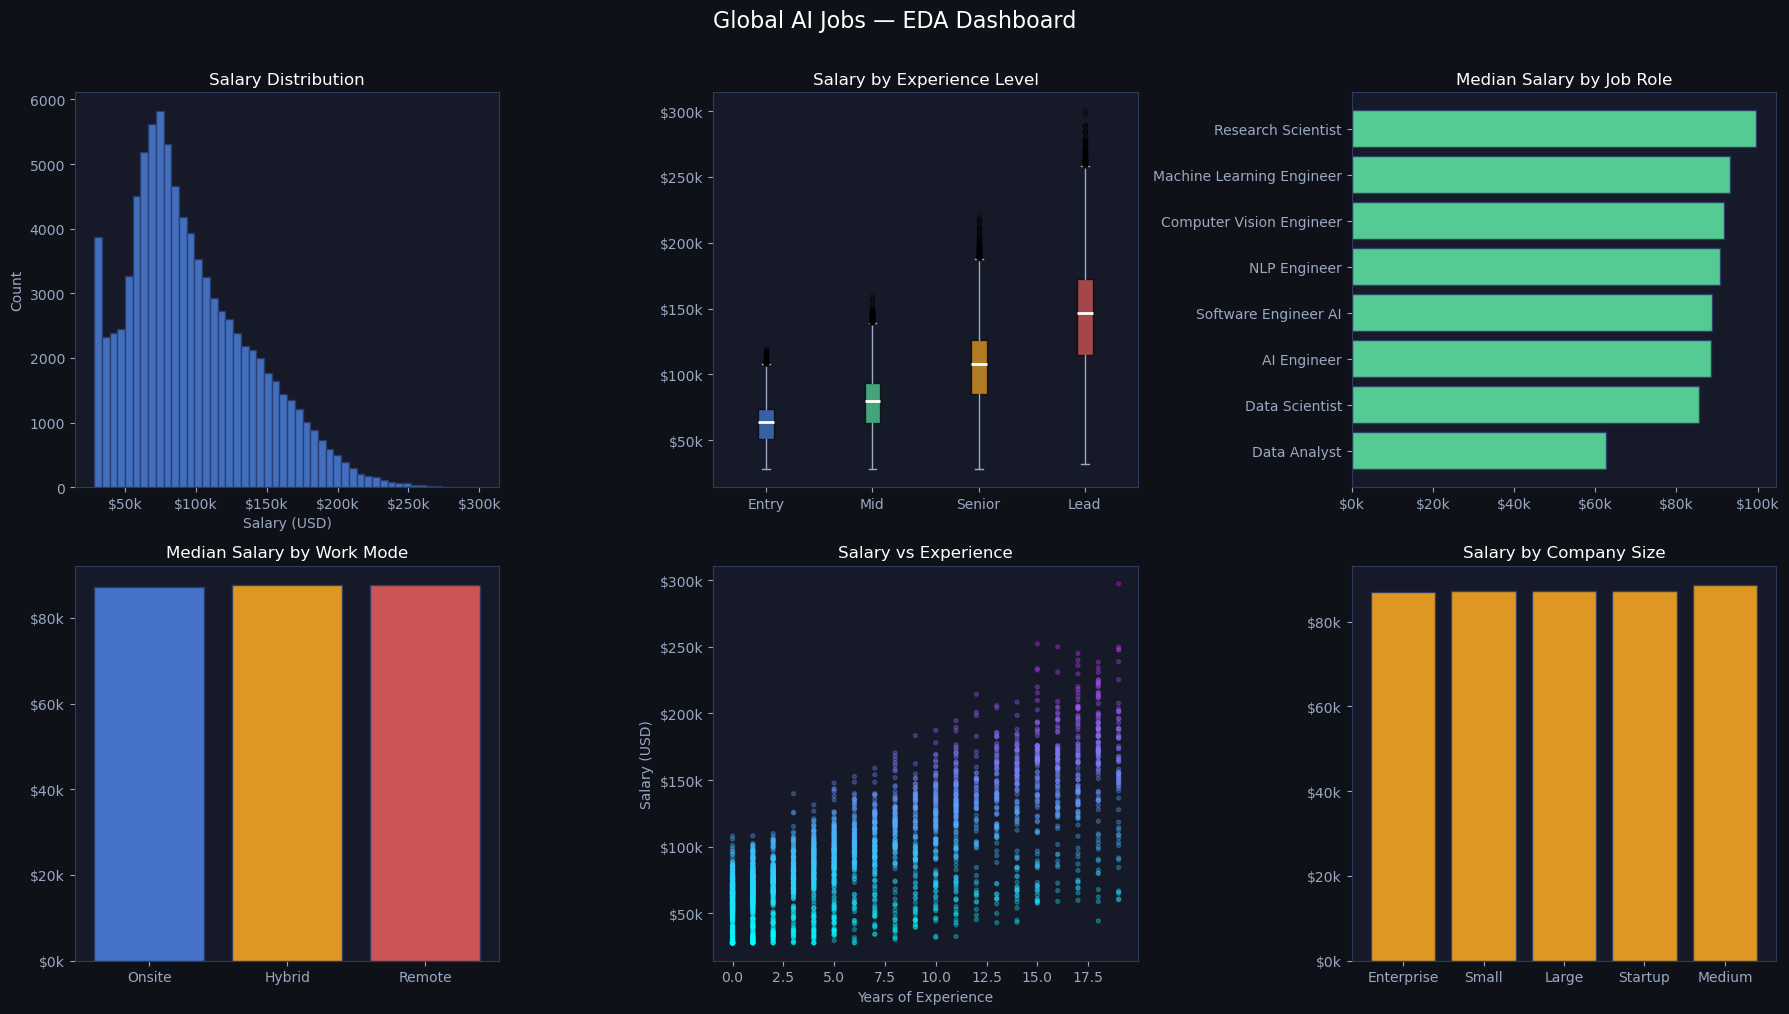

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Global AI Jobs — EDA Dashboard', fontsize=16, color='white', y=1.01)

# 1. Salary distribution
axes[0,0].hist(df['salary_usd'], bins=50, color='#4a7eda', edgecolor='#2a3a6a', alpha=0.85)
axes[0,0].set_title('Salary Distribution')
axes[0,0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))
axes[0,0].set_xlabel('Salary (USD)')
axes[0,0].set_ylabel('Count')

# 2. Salary by experience level
order = ['Entry', 'Mid', 'Senior', 'Lead']
colors_lvl = ['#4a7eda', '#5be0a0', '#f5a623', '#e05b5b']
for i, (lvl, c) in enumerate(zip(order, colors_lvl)):
    data = df[df['experience_level'] == lvl]['salary_usd']
    axes[0,1].boxplot(data, positions=[i], patch_artist=True,
                      boxprops=dict(facecolor=c, alpha=0.7),
                      medianprops=dict(color='white', lw=2),
                      whiskerprops=dict(color='#9ba8c2'),
                      capprops=dict(color='#9ba8c2'),
                      flierprops=dict(marker='.', color='#9ba8c2', alpha=0.3))
axes[0,1].set_xticks(range(len(order)))
axes[0,1].set_xticklabels(order)
axes[0,1].set_title('Salary by Experience Level')
axes[0,1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))

# 3. Median salary by job role
role_sal = df.groupby('job_role')['salary_usd'].median().sort_values()
axes[0,2].barh(role_sal.index, role_sal.values, color='#5be0a0', edgecolor='#2a3a6a', alpha=0.9)
axes[0,2].set_title('Median Salary by Job Role')
axes[0,2].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))

# 4. Work mode salary comparison
wmode_sal = df.groupby('work_mode')['salary_usd'].median().sort_values()
colors_wm = ['#4a7eda', '#f5a623', '#e05b5b', '#a55be0'][:len(wmode_sal)]
axes[1,0].bar(wmode_sal.index, wmode_sal.values, color=colors_wm, edgecolor='#2a3a6a', alpha=0.9)
axes[1,0].set_title('Median Salary by Work Mode')
axes[1,0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))

# 5. Salary vs Experience scatter
sample = df.sample(3000, random_state=42)
sc = axes[1,1].scatter(sample['experience_years'], sample['salary_usd'],
                        alpha=0.3, s=8,
                        c=sample['salary_usd'], cmap='cool',
                        norm=plt.Normalize(28000, 300000))
axes[1,1].set_title('Salary vs Experience')
axes[1,1].set_xlabel('Years of Experience')
axes[1,1].set_ylabel('Salary (USD)')
axes[1,1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))

# 6. Company size salary
csize_sal = df.groupby('company_size')['salary_usd'].median().sort_values()
axes[1,2].bar(csize_sal.index, csize_sal.values, color='#f5a623', edgecolor='#2a3a6a', alpha=0.9)
axes[1,2].set_title('Salary by Company Size')
axes[1,2].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))

plt.tight_layout()
plt.show()

##  Country-Level Analysis

In [25]:
country_stats = df.groupby('country').agg(
    median_salary=('salary_usd', 'median'),
    mean_salary=('salary_usd', 'mean'),
    job_count=('salary_usd', 'count'),
    avg_exp=('experience_years', 'mean')
).sort_values('median_salary', ascending=False).round(0)

print(country_stats.to_string())

             median_salary  mean_salary  job_count  avg_exp
country                                                    
USA               121887.0     132995.0       7405      7.0
Singapore         107137.0     116955.0       7583      7.0
Australia         101083.0     110550.0       7589      7.0
Canada             99710.0     108671.0       7602      7.0
UK                 93746.0     102826.0       7532      7.0
Netherlands        93740.0     102379.0       7514      7.0
Germany            91867.0     100008.0       7461      7.0
Japan              90088.0      98508.0       7350      7.0
France             88106.0      95170.0       7440      7.0
UAE                86097.0      93508.0       7529      7.0
Brazil             49270.0      53705.0       7545      7.0
India              38512.0      43106.0       7450      7.0


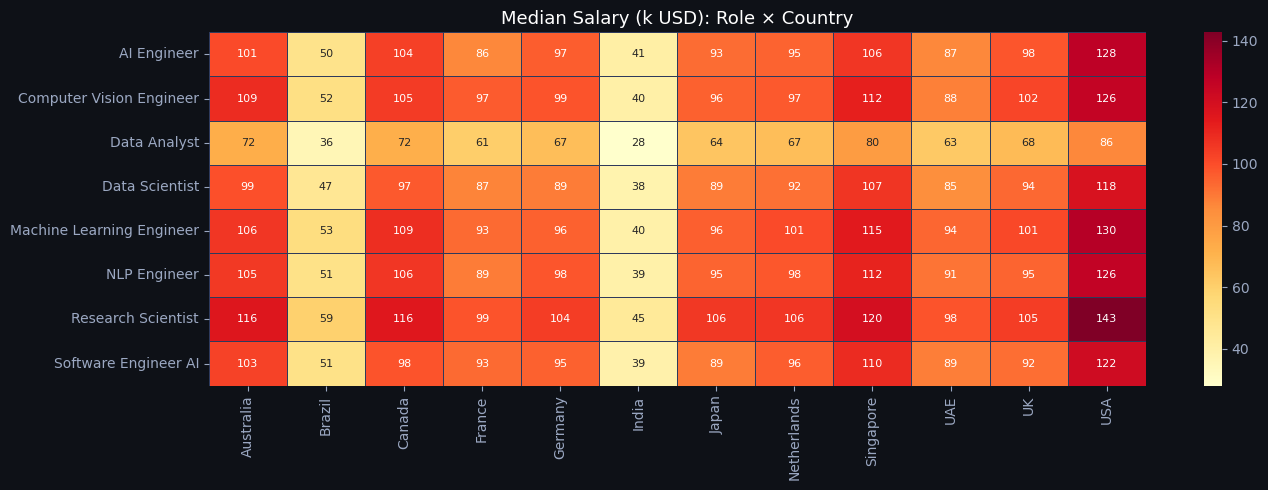

In [26]:
# Role × Country heatmap
pivot = df.pivot_table(values='salary_usd', index='job_role',
                       columns='country', aggfunc='median') / 1000

fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd',
            linewidths=0.5, linecolor='#2e3a5c', ax=ax,
            annot_kws={'size': 8})
ax.set_title('Median Salary (k USD): Role × Country', fontsize=13)
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

## Salary Prediction

In [27]:
# Encode categoricals
le_dict = {}
df_model = df.copy()
cat_cols = ['job_role', 'country', 'experience_level', 'work_mode',
            'company_size', 'education_required', 'industry']
for col in cat_cols:
    le = LabelEncoder()
    df_model[col + '_enc'] = le.fit_transform(df_model[col].astype(str))
    le_dict[col] = le

feature_cols = (
    [c + '_enc' for c in cat_cols]
    + ['experience_years', 'weekly_hours', 'company_rating',
       'ai_adoption_score', 'cost_of_living_index',
       'skill_demand_score', 'job_security_score',
       'career_growth_score', 'economic_index']
)

X = df_model[feature_cols]
y = df_model['salary_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42,
                              max_depth=12, min_samples_leaf=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f' Model trained on {len(X_train):,} samples')
print(f' R² Score:          {r2_score(y_test, y_pred):.4f}')
print(f' Mean Abs Error:    ${mean_absolute_error(y_test, y_pred):,.0f}')

 Model trained on 72,000 samples
 R² Score:          0.9243
 Mean Abs Error:    $9,405


##  Feature Importance & Model Evaluation

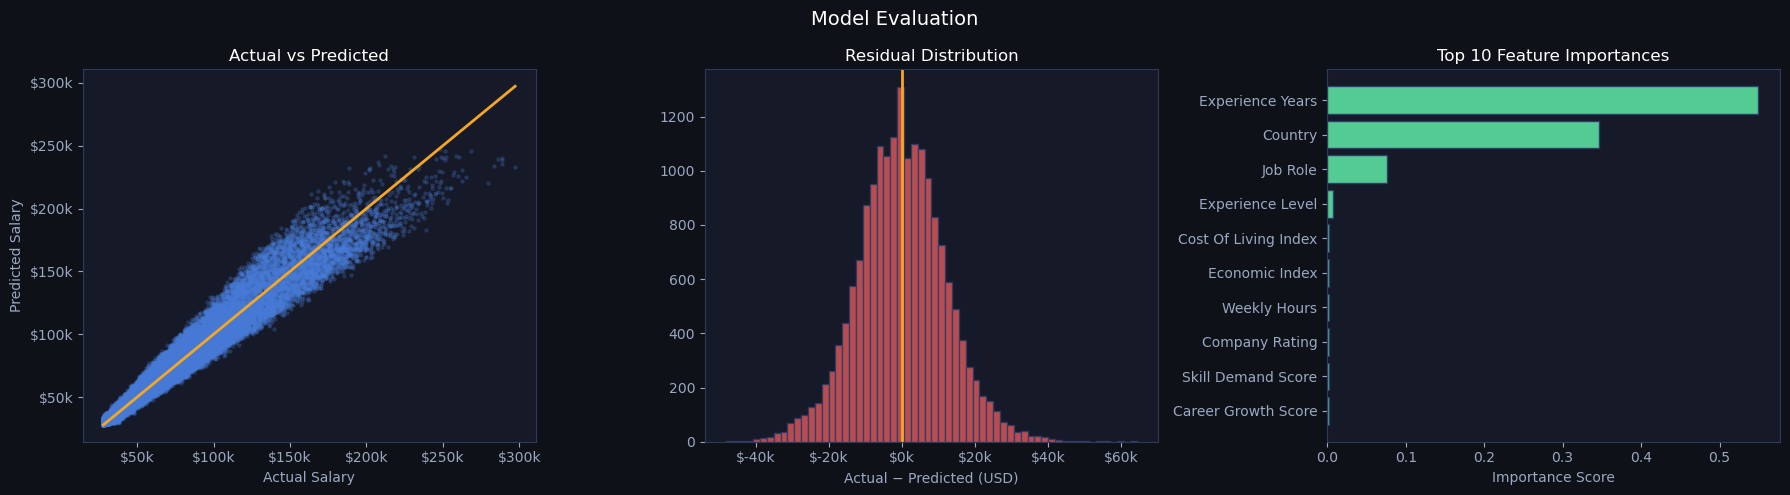

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Model Evaluation', fontsize=14, color='white')

# Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.2, s=5, color='#4a7eda')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
axes[0].plot(lims, lims, color='#f5a623', lw=2)
axes[0].set_title('Actual vs Predicted')
axes[0].set_xlabel('Actual Salary')
axes[0].set_ylabel('Predicted Salary')
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))

# Residuals
residuals = np.array(y_test) - np.array(y_pred)
axes[1].hist(residuals, bins=60, color='#e05b5b', edgecolor='#2a3a6a', alpha=0.8)
axes[1].axvline(0, color='#f5a623', lw=2)
axes[1].set_title('Residual Distribution')
axes[1].set_xlabel('Actual − Predicted (USD)')
axes[1].xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))

# Feature importance
importance = pd.Series(model.feature_importances_, index=feature_cols)
top10 = importance.sort_values(ascending=True).tail(10)
labels = [c.replace('_enc', '').replace('_', ' ').title() for c in top10.index]
axes[2].barh(labels, top10.values, color='#5be0a0', edgecolor='#2a3a6a', alpha=0.9)
axes[2].set_title('Top 10 Feature Importances')
axes[2].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

## Interactive Salary Predictor

In [29]:
def predict_salary(job_role, country, experience_years,
                   experience_level='Mid', work_mode='Remote',
                   company_size='Medium', education='Bachelor',
                   industry='Tech', weekly_hours=40):
    """
    Predict salary for a given profile.
    
    Parameters
    ----------
    job_role         : str  — e.g. 'Data Scientist'
    country          : str  — e.g. 'USA'
    experience_years : int  — 0–20
    experience_level : str  — Entry | Mid | Senior | Lead
    work_mode        : str  — Remote | Onsite | Hybrid
    company_size     : str  — Small | Medium | Large
    education        : str  — Diploma | Bachelor | Master | PhD | Bootcamp
    industry         : str  — Tech | Healthcare | Finance | ...
    weekly_hours     : int  — hours per week
    
    Returns
    -------
    float  predicted annual salary in USD
    """
    defaults = df.groupby(['country', 'job_role'])[
        ['company_rating', 'ai_adoption_score', 'cost_of_living_index',
         'skill_demand_score', 'job_security_score', 'career_growth_score',
         'economic_index']
    ].mean()
    try:
        d = defaults.loc[(country, job_role)]
    except KeyError:
        d = df[['company_rating', 'ai_adoption_score', 'cost_of_living_index',
                'skill_demand_score', 'job_security_score',
                'career_growth_score', 'economic_index']].mean()

    enc_map = {
        'job_role': job_role, 'country': country,
        'experience_level': experience_level, 'work_mode': work_mode,
        'company_size': company_size, 'education_required': education,
        'industry': industry,
    }
    row = {}
    for col, val in enc_map.items():
        try:
            row[col + '_enc'] = le_dict[col].transform([val])[0]
        except (ValueError, KeyError):
            row[col + '_enc'] = 0

    row.update({
        'experience_years': experience_years,
        'weekly_hours': weekly_hours,
        'company_rating': d.get('company_rating', df['company_rating'].mean()),
        'ai_adoption_score': d.get('ai_adoption_score', df['ai_adoption_score'].mean()),
        'cost_of_living_index': d.get('cost_of_living_index', df['cost_of_living_index'].mean()),
        'skill_demand_score': d.get('skill_demand_score', df['skill_demand_score'].mean()),
        'job_security_score': d.get('job_security_score', df['job_security_score'].mean()),
        'career_growth_score': d.get('career_growth_score', df['career_growth_score'].mean()),
        'economic_index': d.get('economic_index', df['economic_index'].mean()),
    })
    X_input = pd.DataFrame([row])[feature_cols]
    return round(model.predict(X_input)[0], 0)

print('🔮 Salary Predictor ready! Example predictions:')
examples = [
    ('Data Scientist',         'USA',         5, 'Mid'),
    ('Machine Learning Engineer', 'UK',        8, 'Senior'),
    ('AI Engineer',            'India',        2, 'Entry'),
    ('Research Scientist',     'Germany',     12, 'Lead'),
    ('Data Analyst',           'Australia',    3, 'Mid'),
]
for role, country, yrs, lvl in examples:
    sal = predict_salary(role, country, yrs, lvl)
    print(f'  {role:30s} | {country:12s} | {yrs:2d} yrs | {lvl:6s} → ${sal:,.0f}')

🔮 Salary Predictor ready! Example predictions:
  Data Scientist                 | USA          |  5 yrs | Mid    → $109,122
  Machine Learning Engineer      | UK           |  8 yrs | Senior → $116,901
  AI Engineer                    | India        |  2 yrs | Entry  → $30,412
  Research Scientist             | Germany      | 12 yrs | Lead   → $139,527
  Data Analyst                   | Australia    |  3 yrs | Mid    → $62,867


In [30]:
# --- Try your own prediction here ---
my_prediction = predict_salary(
    job_role         = 'Data Scientist',
    country          = 'USA',
    experience_years = 5,
    experience_level = 'Mid',
    work_mode        = 'Remote',
    company_size     = 'Large',
    education        = 'Master',
    industry         = 'Tech',
    weekly_hours     = 40
)
print(f'\n💰 Predicted Salary: ${my_prediction:,.0f} / year')


💰 Predicted Salary: $106,433 / year


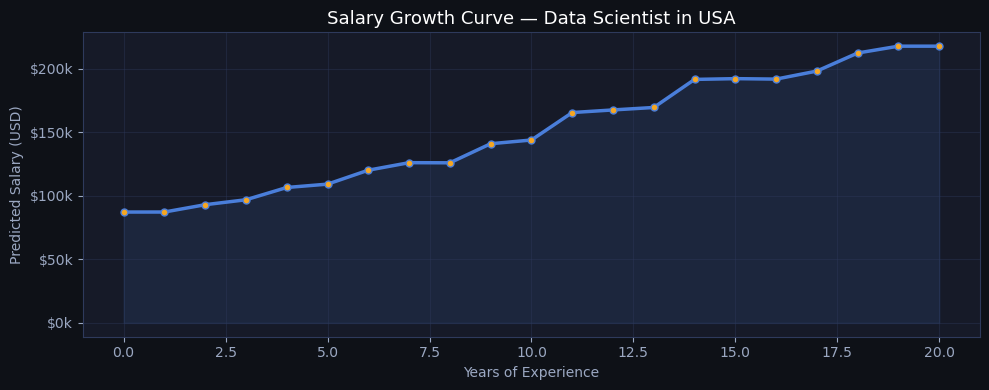

In [31]:
# Salary growth curve for a profile
role_to_plot = 'Data Scientist'
country_to_plot = 'USA'

exp_range = np.arange(0, 21)
salaries  = [predict_salary(role_to_plot, country_to_plot, int(e), 'Mid') for e in exp_range]

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(exp_range, salaries, color='#4a7eda', lw=2.5, marker='o',
        markersize=5, markerfacecolor='#f5a623')
ax.fill_between(exp_range, salaries, alpha=0.12, color='#4a7eda')
ax.set_title(f'Salary Growth Curve — {role_to_plot} in {country_to_plot}', fontsize=13)
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Predicted Salary (USD)')
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x/1000:.0f}k'))
ax.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

## 9. ✅ Conclusion

| Metric | Value |
|--------|-------|
| Dataset Size | 90,000 records |
| Countries Covered | 12 |
| Job Roles | 8 |
| Model | Random Forest (200 trees) |

**Key Findings:**
- Experience level and years of experience are the strongest salary predictors
- USA leads in median salaries; India shows competitive growth roles
- Remote work shows comparable or higher salaries vs. onsite in many markets
- AI adoption score significantly correlates with compensation

**Next Steps:**
- 🚀 Run `streamlit run ai_salary_app.py` for the interactive dashboard
- 🔧 Try gradient boosting or XGBoost for potentially better accuracy
- 📊 Add time-series analysis using the `year` column